In [92]:
import numpy as np
import pandas as pd


In [93]:
df = pd.read_csv('uncleaned_1015.csv')

df

,Unnamed: 0,title,id,popularity,vote_count,vote_average,release_date,original_language,adult,budget,genres,revenue,year_released,decade_released,keywords
0,0,Watch Your Six,1072246,0.600,1,10.0,NaN,es,False,1.0,"['Action', 'Thriller', 'Comedy', 'Drama']",4999999999,NaN,NaN,NaN
1,1,Avatar,19995,538.894,28651,7.6,2009-12-15,en,False,237000000.0,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",2920357254,2009.0,2000s,"['culture clash', 'future', 'space war', 'spac..."
2,2,Avengers: Endgame,299534,224.007,22830,8.3,2019-04-24,en,False,356000000.0,"['Adventure', 'Science Fiction', 'Action']",2799439100,2019.0,2010s,"['space travel', 'time travel', 'time machine'..."
3,3,Avatar: The Way of Water,76600,1124.883,5777,7.7,2022-12-14,en,False,460000000.0,"['Science Fiction', 'Adventure', 'Action']",2293000000,2022.0,2020s,"['loss of loved one', 'dying and death', 'alie..."
4,4,Titanic,597,173.561,22573,7.9,1997-11-18,en,False,200000000.0,"['Drama', 'Romance']",2187463944,1997.0,1990s,"['drowning', 'evacuation', 'shipwreck', 'icebe..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,Stolen Kisses,255,10.010,351,7.3,1968-09-04,fr,False,350000.0,"['Comedy', 'Drama', 'Romance']",1500000,1968.0,1960s,"['individual', 'paris, france', 'shyness', 'ad..."
9996,9996,To Be or Not to Be,198,9.185,571,7.9,1942-03-05,en,False,1200000.0,"['Comedy', 'War']",1500000,1942.0,Before 1960s,"['love triangle', 'london, england', 'infideli..."
9997,9997,M. Butterfly,1413,12.247,183,6.6,1993-09-09,en,False,NaN,"['Romance', 'Drama']",1499795,1993.0,1990s,"['china', 'opera singer', '1960s']"
9998,9998,The Raven,29056,8.813,194,6.4,1963-01-25,en,False,350000.0,"['Comedy', 'Fantasy', 'Horror']",1499275,1963.0,1960s,"['magic', 'castle', 'sorcery', 'parody', 'sorc..."


# Data cleaning

In [94]:
# Create copy of dataset
movie_cleaning = df.copy()

#Convert all variable names to uppercase
movie_cleaning.columns = movie_cleaning.columns.str.upper()

movie_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UNNAMED: 0         10000 non-null  int64  
 1   TITLE              10000 non-null  object 
 2   ID                 10000 non-null  int64  
 3   POPULARITY         10000 non-null  float64
 4   VOTE_COUNT         10000 non-null  int64  
 5   VOTE_AVERAGE       10000 non-null  float64
 6   RELEASE_DATE       9953 non-null   object 
 7   ORIGINAL_LANGUAGE  10000 non-null  object 
 8   ADULT              10000 non-null  bool   
 9   BUDGET             7495 non-null   float64
 10  GENRES             10000 non-null  object 
 11  REVENUE            10000 non-null  int64  
 12  YEAR_RELEASED      9953 non-null   float64
 13  DECADE_RELEASED    9953 non-null   object 
 14  KEYWORDS           8991 non-null   object 
dtypes: bool(1), float64(4), int64(4), object(6)
memory usage: 1.1+ MB


We will remove all rows that have any NULL values so that all rows will have non-null values that can be used for analysis

In [95]:
movie_cleaning.isnull().sum()

UNNAMED: 0              0
TITLE                   0
ID                      0
POPULARITY              0
VOTE_COUNT              0
VOTE_AVERAGE            0
RELEASE_DATE           47
ORIGINAL_LANGUAGE       0
ADULT                   0
BUDGET               2505
GENRES                  0
REVENUE                 0
YEAR_RELEASED          47
DECADE_RELEASED        47
KEYWORDS             1009
dtype: int64

In [96]:
# Create new dataframe without NaN values
movie_nonnull = movie_cleaning.dropna()
movie_nonnull.isnull().sum()

UNNAMED: 0           0
TITLE                0
ID                   0
POPULARITY           0
VOTE_COUNT           0
VOTE_AVERAGE         0
RELEASE_DATE         0
ORIGINAL_LANGUAGE    0
ADULT                0
BUDGET               0
GENRES               0
REVENUE              0
YEAR_RELEASED        0
DECADE_RELEASED      0
KEYWORDS             0
dtype: int64

We will change release data type to datetime so it can be used for timeseries, and year released & budget will be changed to int data type as they should be whole numbers rather than decimals. 

In [97]:
df_cleaned = movie_nonnull.copy()
df_cleaned = df_cleaned.drop(columns=['UNNAMED: 0'])
df_cleaned['RELEASE_DATE'] = pd.to_datetime(df_cleaned['RELEASE_DATE'],format='%Y-%m-%d')
df_cleaned['YEAR_RELEASED'] = df_cleaned['YEAR_RELEASED'].astype('int64')
df_cleaned['BUDGET'] = df_cleaned['BUDGET'].astype('int64')
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6971 entries, 1 to 9998
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   TITLE              6971 non-null   object        
 1   ID                 6971 non-null   int64         
 2   POPULARITY         6971 non-null   float64       
 3   VOTE_COUNT         6971 non-null   int64         
 4   VOTE_AVERAGE       6971 non-null   float64       
 5   RELEASE_DATE       6971 non-null   datetime64[ns]
 6   ORIGINAL_LANGUAGE  6971 non-null   object        
 7   ADULT              6971 non-null   bool          
 8   BUDGET             6971 non-null   int64         
 9   GENRES             6971 non-null   object        
 10  REVENUE            6971 non-null   int64         
 11  YEAR_RELEASED      6971 non-null   int64         
 12  DECADE_RELEASED    6971 non-null   object        
 13  KEYWORDS           6971 non-null   object        
dtypes: bool(

In [98]:
import re

df_cleaned["GENRES"] = df_cleaned["GENRES"].str.replace("[","", regex = True)
df_cleaned["GENRES"] = df_cleaned["GENRES"].str.replace("]","", regex = True)
df_cleaned["GENRES"] = df_cleaned["GENRES"].str.replace("'","", regex = True)
df_cleaned

,TITLE,ID,POPULARITY,VOTE_COUNT,VOTE_AVERAGE,RELEASE_DATE,ORIGINAL_LANGUAGE,ADULT,BUDGET,GENRES,REVENUE,YEAR_RELEASED,DECADE_RELEASED,KEYWORDS
1,Avatar,19995,538.894,28651,7.6,2009-12-15,en,False,237000000,"Action, Adventure, Fantasy, Science Fiction",2920357254,2009,2000s,"['culture clash', 'future', 'space war', 'spac..."
2,Avengers: Endgame,299534,224.007,22830,8.3,2019-04-24,en,False,356000000,"Adventure, Science Fiction, Action",2799439100,2019,2010s,"['space travel', 'time travel', 'time machine'..."
3,Avatar: The Way of Water,76600,1124.883,5777,7.7,2022-12-14,en,False,460000000,"Science Fiction, Adventure, Action",2293000000,2022,2020s,"['loss of loved one', 'dying and death', 'alie..."
4,Titanic,597,173.561,22573,7.9,1997-11-18,en,False,200000000,"Drama, Romance",2187463944,1997,1990s,"['drowning', 'evacuation', 'shipwreck', 'icebe..."
5,Star Wars: The Force Awakens,140607,59.017,17831,7.3,2015-12-15,en,False,245000000,"Adventure, Action, Science Fiction, Fantasy",2068223624,2015,2010s,"['android', 'spacecraft', 'space opera']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,At Long Last Love,4704,2.956,19,5.5,1975-03-01,en,False,6000000,"Comedy, Music, Romance",1500000,1975,1970s,"['gambling', 'singer']"
9994,Under Capricorn,4175,7.906,135,6.0,1949-09-08,en,False,2500000,"Crime, Drama, History, Romance, Thriller",1500000,1949,Before 1960s,"['loss of loved one', ""love of one's life"", 'i..."
9995,Stolen Kisses,255,10.010,351,7.3,1968-09-04,fr,False,350000,"Comedy, Drama, Romance",1500000,1968,1960s,"['individual', 'paris, france', 'shyness', 'ad..."
9996,To Be or Not to Be,198,9.185,571,7.9,1942-03-05,en,False,1200000,"Comedy, War",1500000,1942,Before 1960s,"['love triangle', 'london, england', 'infideli..."


# Exploratory data analysis

In [99]:
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()

Budget

<AxesSubplot:>

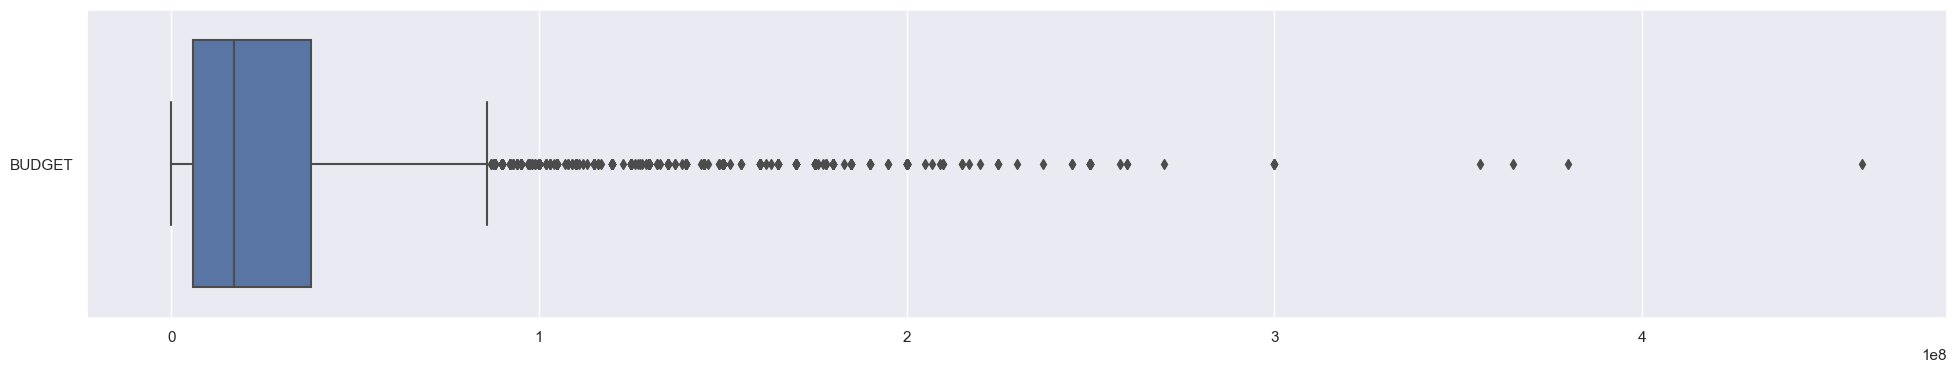

In [100]:
df_budget = pd.DataFrame(df_cleaned['BUDGET'])
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = df_budget, orient = "h")

In [101]:
df_budget.describe()

,BUDGET
count,6.971000e+03
mean,3.105691e+07
std,4.133186e+07
min,1.000000e+00
25%,5.791426e+06
50%,1.700000e+07
75%,3.800000e+07
max,4.600000e+08


Vote average

<AxesSubplot:>

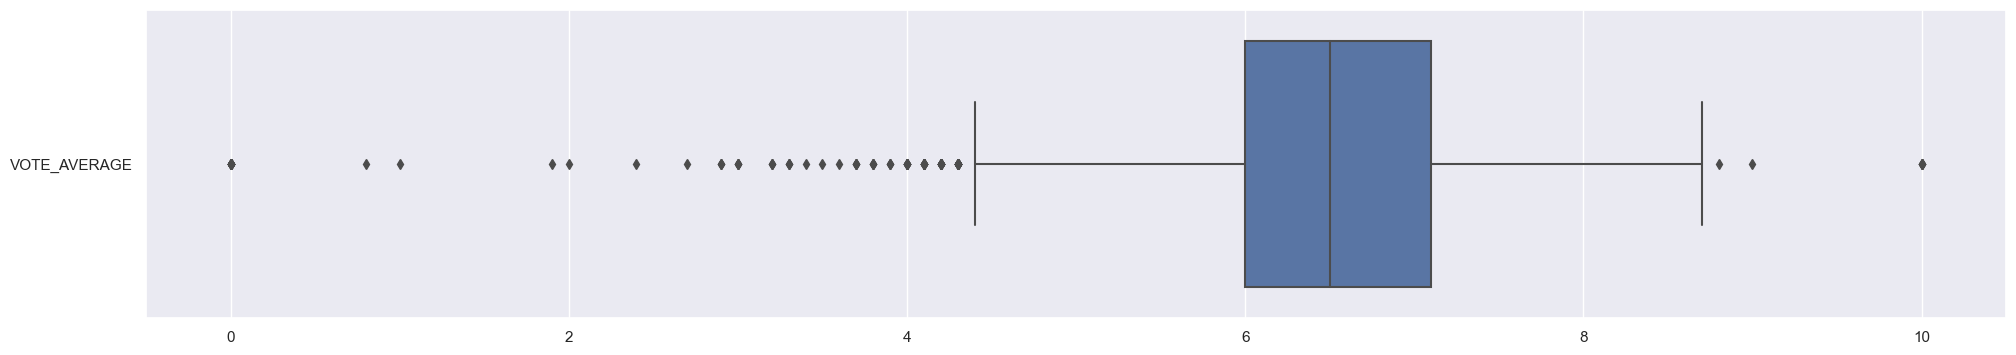

In [102]:
df_voteavg = pd.DataFrame(df_cleaned['VOTE_AVERAGE'])
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = df_voteavg, orient = "h")

In [103]:
df_voteavg.describe()

,VOTE_AVERAGE
count,6971.000000
mean,6.491981
std,0.898705
min,0.000000
25%,6.000000
50%,6.500000
75%,7.100000
max,10.000000


Genres

Genres listed on TMDB website: https://www.themoviedb.org/bible/movie/59f3b16d9251414f20000006#:~:text=The%20genres%20currently%20available%20in,Movie%2C%20War%2C%20and%20Western. 



We will take only the first genre as a way to better capture what the movie is about without too much overlap with other movies so there can be more distinct clusters found

In [104]:
# Split string into list seperated by comma
df_genres = pd.DataFrame(df_cleaned["GENRES"])
df_genres["GENRES"] = df_genres["GENRES"].str.split(',')
df_genres["MAIN_GENRE"] = df_genres["GENRES"].str[0]

df_genres    

,GENRES,MAIN_GENRE
1,"[Action, Adventure, Fantasy, Science Fiction]",Action
2,"[Adventure, Science Fiction, Action]",Adventure
3,"[Science Fiction, Adventure, Action]",Science Fiction
4,"[Drama, Romance]",Drama
5,"[Adventure, Action, Science Fiction, Fantasy]",Adventure
...,...,...
9993,"[Comedy, Music, Romance]",Comedy
9994,"[Crime, Drama, History, Romance, Thriller]",Crime
9995,"[Comedy, Drama, Romance]",Comedy
9996,"[Comedy, War]",Comedy


In [105]:
df_maingenres = df_genres[["MAIN_GENRE"]].copy()
MG_freq = df_maingenres["MAIN_GENRE"].value_counts()

MG_freq

Drama              1529
Comedy             1501
Action             1126
Adventure           485
Horror              465
Crime               327
Thriller            278
Animation           222
Romance             185
Science Fiction     179
Fantasy             178
Family              153
Mystery              83
War                  64
Music                62
Western              54
History              41
Documentary          37
                      1
TV Movie              1
Name: MAIN_GENRE, dtype: int64

In [106]:
#Remove TV movie and no genre as only 1 
MG_items = df_maingenres["MAIN_GENRE"].value_counts().loc[lambda x : x>1]
MG_items

Drama              1529
Comedy             1501
Action             1126
Adventure           485
Horror              465
Crime               327
Thriller            278
Animation           222
Romance             185
Science Fiction     179
Fantasy             178
Family              153
Mystery              83
War                  64
Music                62
Western              54
History              41
Documentary          37
Name: MAIN_GENRE, dtype: int64

<Figure size 1200x200 with 0 Axes>

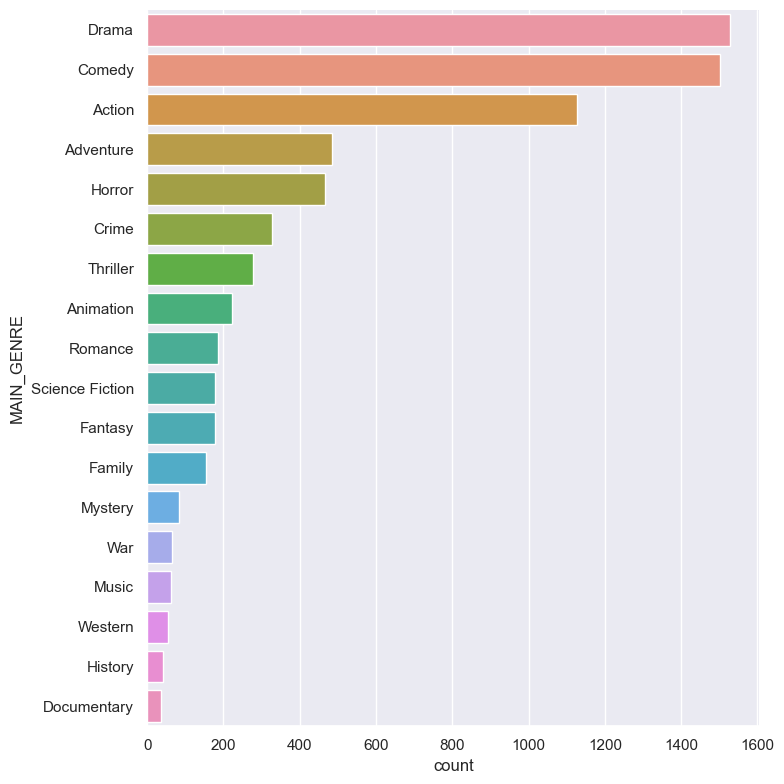

In [107]:
df_mgEDA = df_maingenres.groupby('MAIN_GENRE').filter(lambda x: len(x) > 1)
f = plt.figure(figsize=(12, 2))
sb.catplot(y = 'MAIN_GENRE', data = df_mgEDA, kind = "count", height = 8, order = df_mgEDA['MAIN_GENRE'].value_counts().index)

Movies in dataset mostly fall under Drama, Comedy and Action, hence if cluster by genre most will fall under these 3 categories

Adult

<Figure size 2400x200 with 0 Axes>

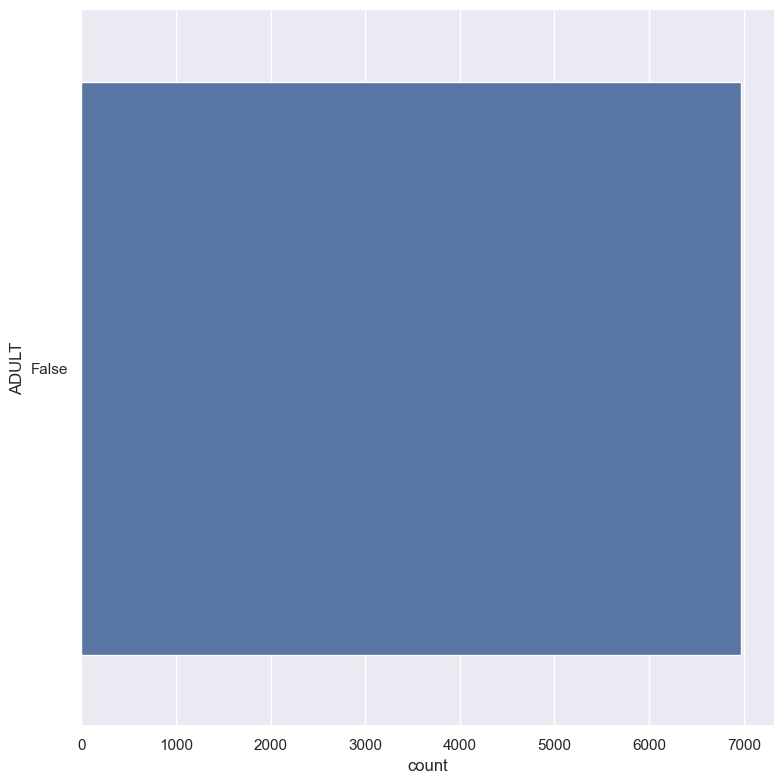

In [108]:
df_adult = pd.DataFrame(df_cleaned['ADULT'])
f = plt.figure(figsize=(24, 2))
sb.catplot(y = 'ADULT', data = df_adult, kind = "count", height = 8)

In [109]:
df_adult.value_counts()

ADULT
False    6971
dtype: int64

Since in this case all the movies are non-adult, we will remove this factor from dataframe 

Original language

In [110]:
OL_freq = df_cleaned["ORIGINAL_LANGUAGE"].value_counts()

OL_freq

en    5896
hi     194
fr     176
es      91
ja      83
ko      63
ru      63
zh      53
ta      47
ml      43
it      42
de      35
cn      28
te      26
no      15
sv      14
pt       9
da       9
th       8
fi       8
kn       7
fa       7
pl       6
nl       6
ur       6
tr       5
tl       5
ar       3
id       3
cs       3
el       2
pa       2
he       2
bn       2
af       1
nb       1
iu       1
ca       1
uk       1
et       1
ro       1
vi       1
hu       1
Name: ORIGINAL_LANGUAGE, dtype: int64

<Figure size 1200x200 with 0 Axes>

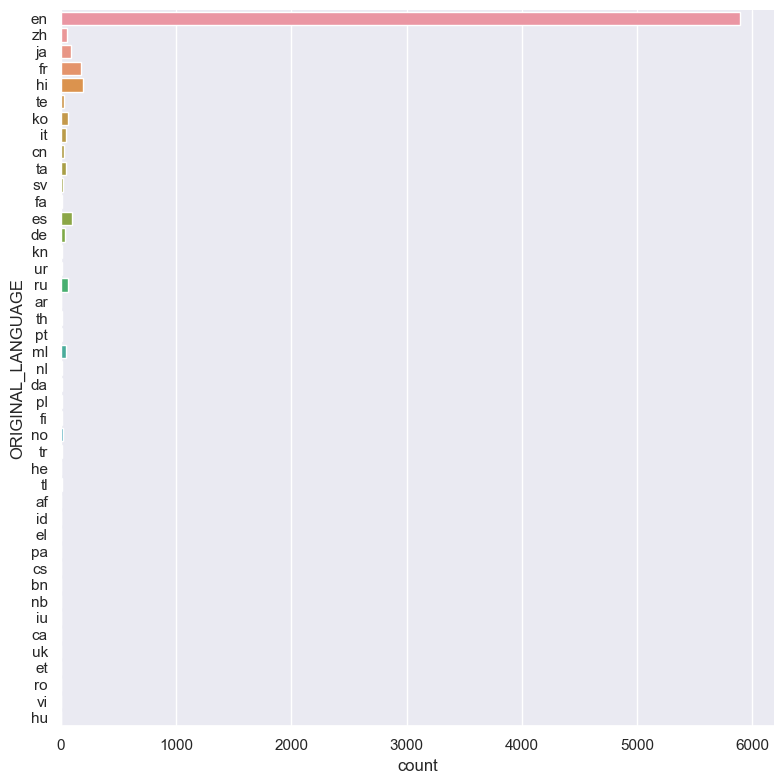

In [111]:
df_adult = pd.DataFrame(df_cleaned['ORIGINAL_LANGUAGE'])
f = plt.figure(figsize=(12, 2))
sb.catplot(y = 'ORIGINAL_LANGUAGE', data = df_adult, kind = "count", height = 8)

As there are many languages with only 1 movie, we will limit the data to languages with at least 10 movies

In [112]:
OL_items = df_cleaned["ORIGINAL_LANGUAGE"].value_counts().loc[lambda x : x>10].rename_axis('Languages').reset_index(name='counts')
OL_items

,Languages,counts
0,en,5896
1,hi,194
2,fr,176
3,es,91
4,ja,83
5,ko,63
6,ru,63
7,zh,53
8,ta,47
9,ml,43


(0.0, 100.0, 0.0, 100.0)

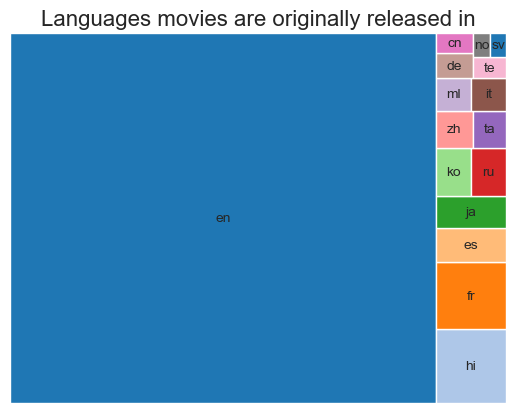

In [113]:
import squarify

squarify.plot(sizes=OL_items['counts'], label=OL_items['Languages'], 
              color = sb.color_palette("tab20", len(OL_items['counts'].value_counts())), 
              text_kwargs={'fontsize': 10})
plt.title('Languages movies are originally released in', fontsize=16)
plt.axis('off')


Release date

In [114]:
DR_freq = df_cleaned['DECADE_RELEASED'].value_counts()

DR_freq

2010s           2215
2000s           1907
1990s           1130
1980s            711
Before 1960s     314
2020s            280
1970s            252
1960s            162
Name: DECADE_RELEASED, dtype: int64

<Figure size 1200x200 with 0 Axes>

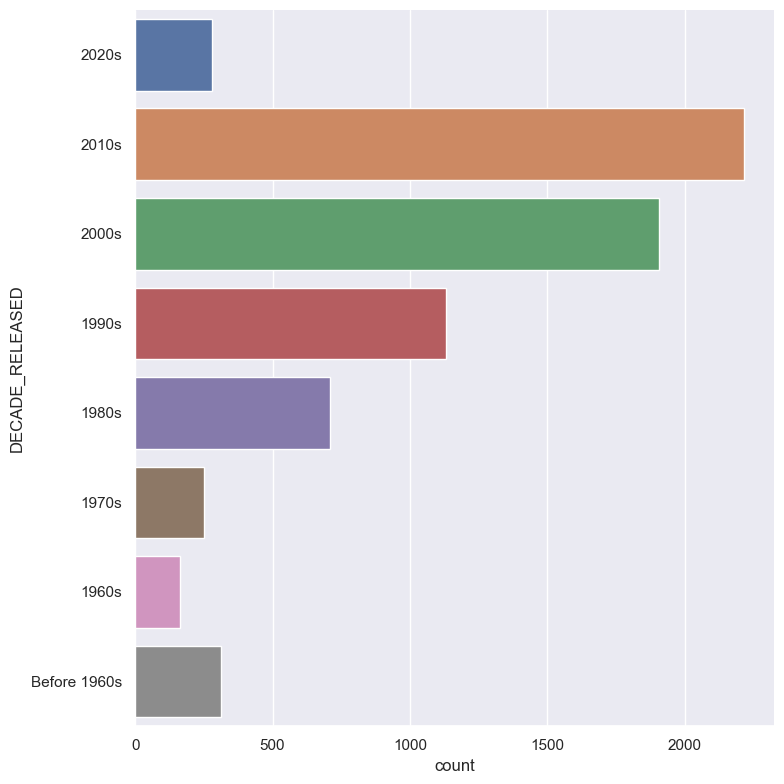

In [115]:
df_dr = pd.DataFrame(df_cleaned['DECADE_RELEASED'])
f = plt.figure(figsize=(12, 2))
sb.catplot(y = 'DECADE_RELEASED', data = df_dr, kind = "count", height = 8, order = ["2020s","2010s", "2000s", "1990s", "1980s", "1970s", "1960s", "Before 1960s"])

In [116]:
df_correlationbudget = df_cleaned[["BUDGET", "VOTE_AVERAGE"]].copy()
df_correlationbudget

,BUDGET,VOTE_AVERAGE
1,237000000,7.6
2,356000000,8.3
3,460000000,7.7
4,200000000,7.9
5,245000000,7.3
...,...,...
9993,6000000,5.5
9994,2500000,6.0
9995,350000,7.3
9996,1200000,7.9


<AxesSubplot:>

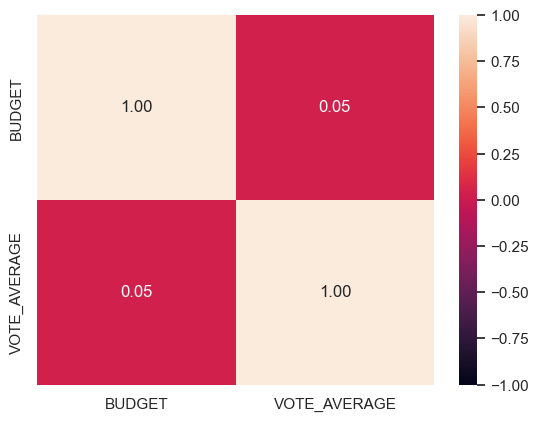

In [117]:
sb.heatmap(df_correlationbudget.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

Hence, BUDGET has basically no correlation to VOTE_AVERAGE, and would be distinct variables to use in clustering algorithm

In [118]:
df_cleaned["MAIN_GENRE"] = df_maingenres
df_correlationMG = df_cleaned[["VOTE_AVERAGE", "MAIN_GENRE"]].copy()
df_correlationMG = df_correlationMG.groupby('MAIN_GENRE').filter(lambda x: len(x) > 1)
df_correlationMG

,VOTE_AVERAGE,MAIN_GENRE
1,7.6,Action
2,8.3,Adventure
3,7.7,Science Fiction
4,7.9,Drama
5,7.3,Adventure
...,...,...
9993,5.5,Comedy
9994,6.0,Crime
9995,7.3,Comedy
9996,7.9,Comedy


<AxesSubplot:xlabel='MAIN_GENRE', ylabel='VOTE_AVERAGE'>

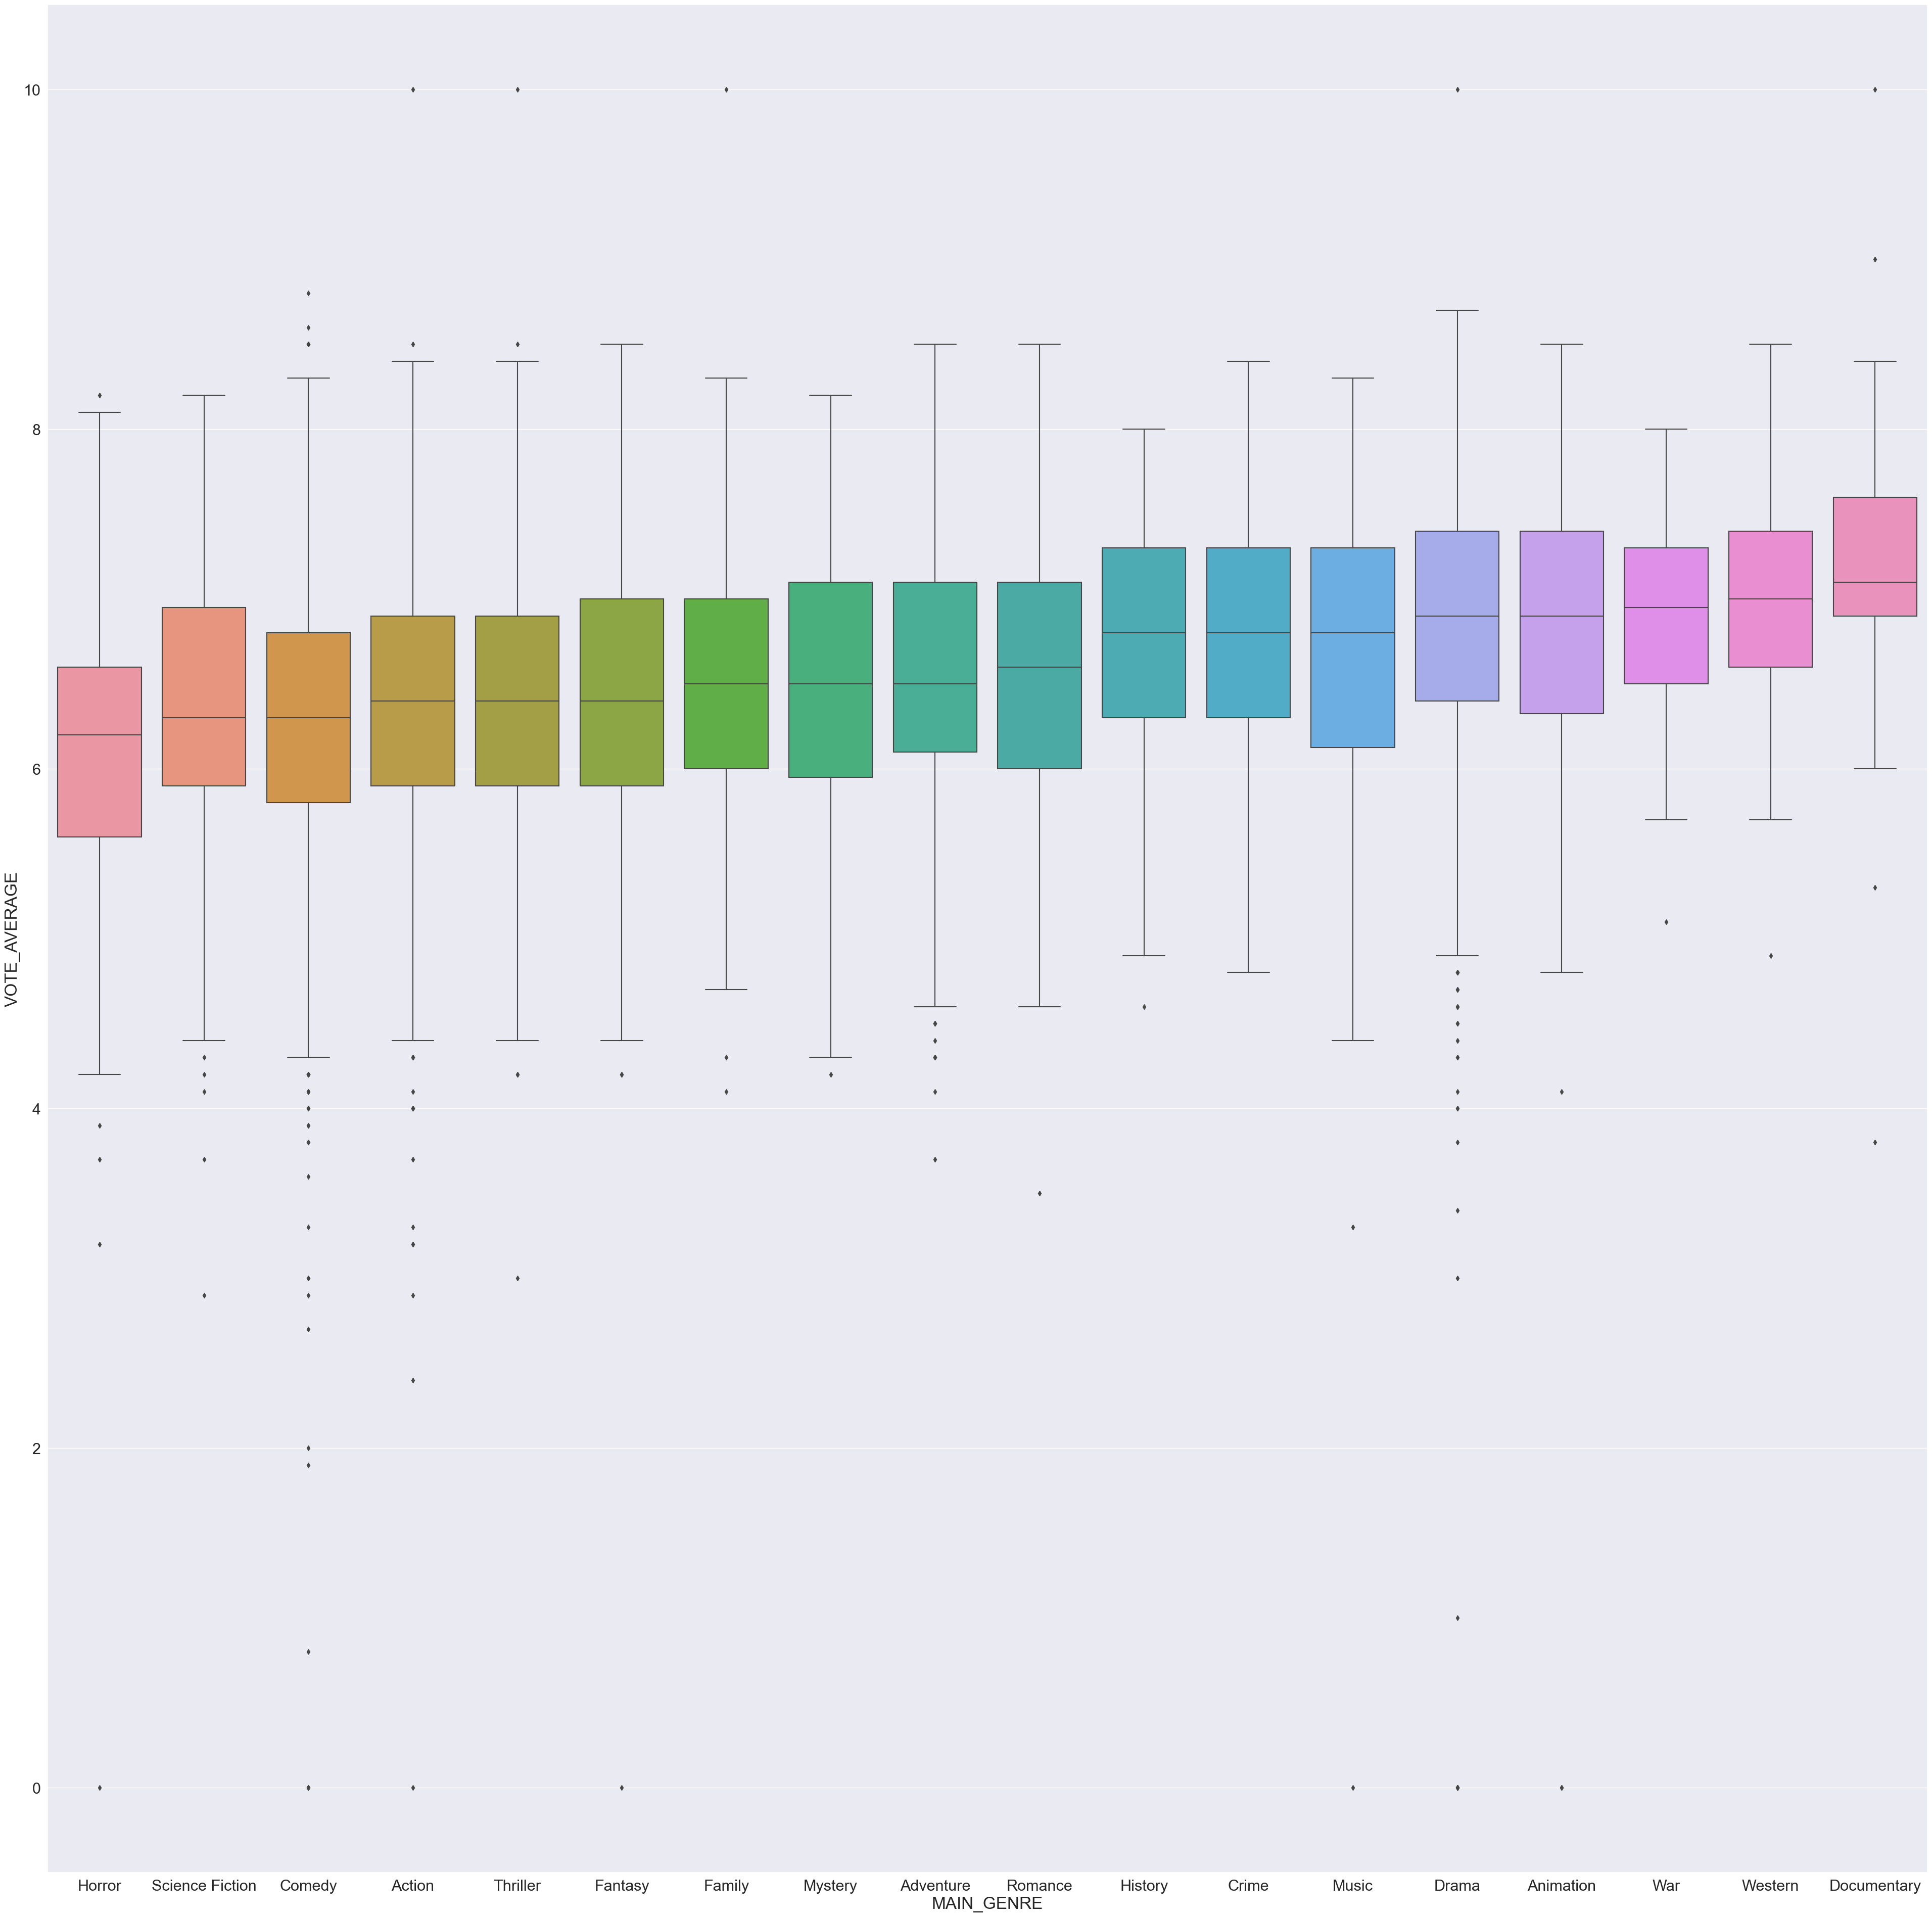

In [119]:
sb.set(font_scale=2)
f= plt.subplots(figsize=(48, 48))
sb.boxplot(x = "MAIN_GENRE", y = "VOTE_AVERAGE", data = df_correlationMG, width = 0.8, 
           order = df_correlationMG.groupby("MAIN_GENRE")["VOTE_AVERAGE"].median().sort_values().index)

VOTE_AVERAGE does not change too much with MAIN_GENRE, suggesting little correlation between MAIN_GENRE and VOTE_AVERAGE, hence both categories should be taken into account will doing clustering.

In [120]:
df_correlationOL = df_OLEDA[["ORIGINAL_LANGUAGE", "VOTE_AVERAGE"]].copy()
df_correlationOL

,ORIGINAL_LANGUAGE,VOTE_AVERAGE
1,en,7.6
2,en,8.3
3,en,7.7
4,en,7.9
5,en,7.3
...,...,...
9993,en,5.5
9994,en,6.0
9995,fr,7.3
9996,en,7.9


<AxesSubplot:xlabel='ORIGINAL_LANGUAGE', ylabel='VOTE_AVERAGE'>

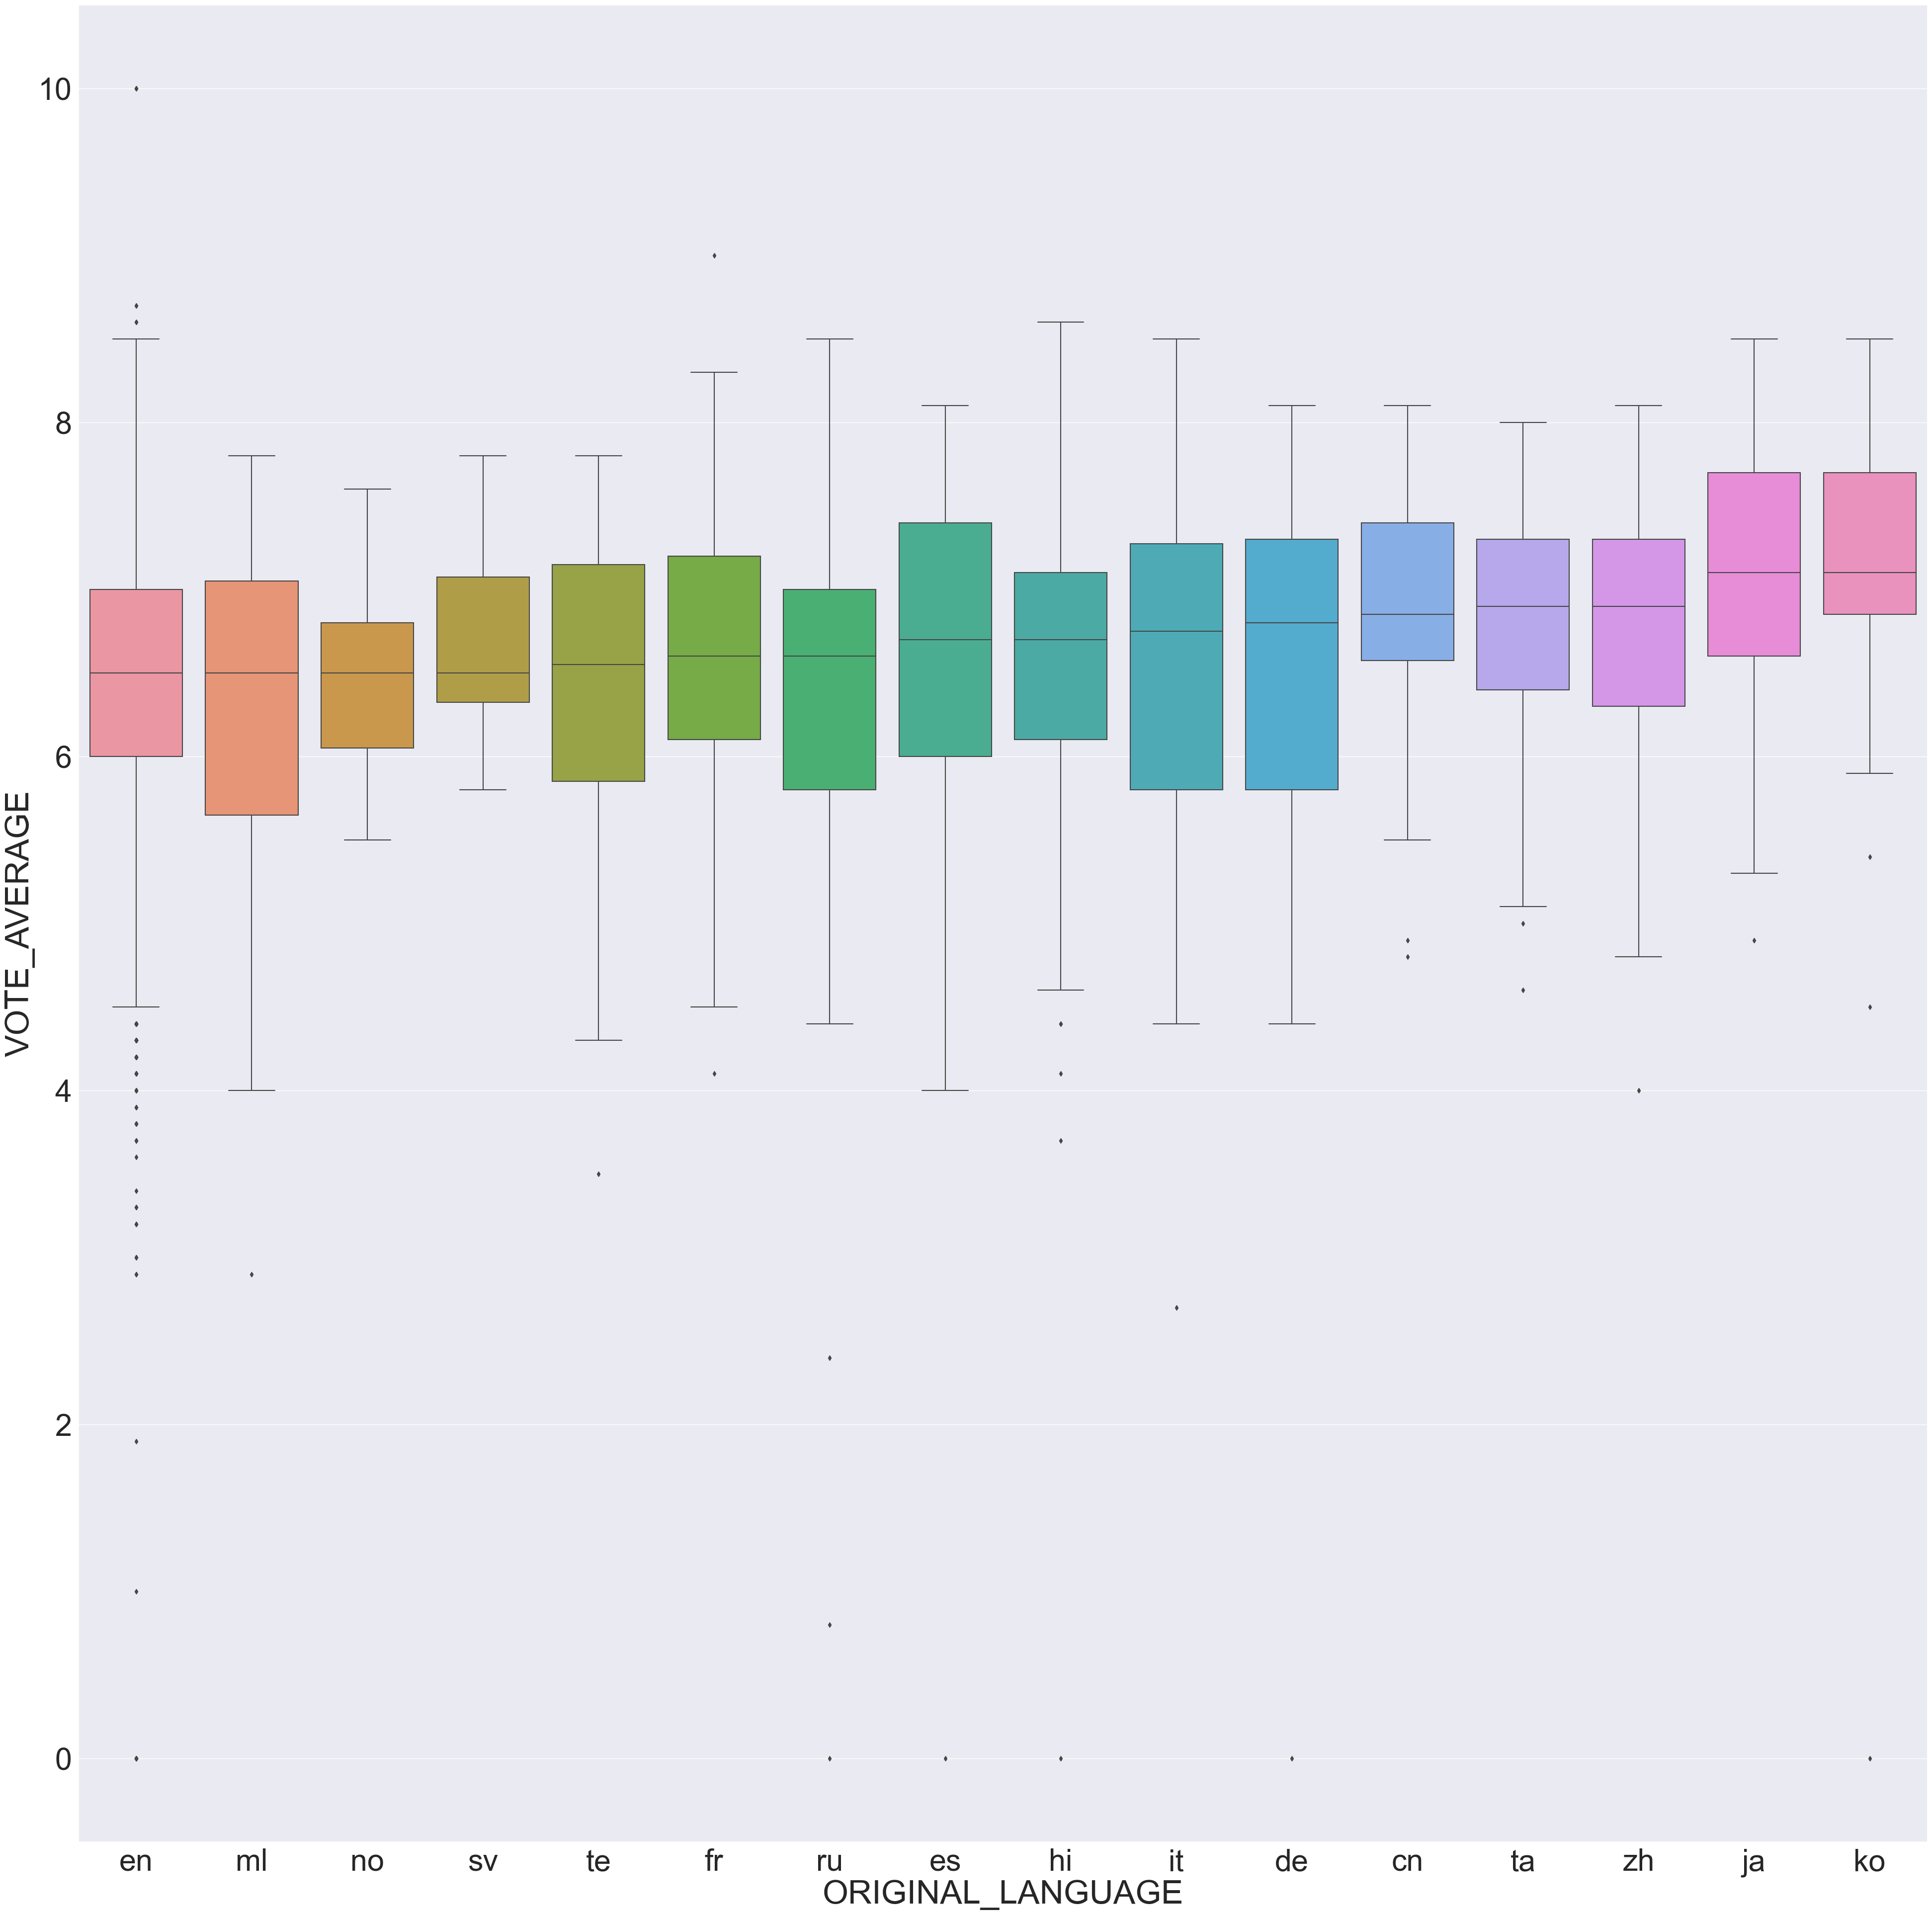

In [121]:
sb.set(font_scale=4)
f= plt.subplots(figsize=(48, 48))
sb.boxplot(x = "ORIGINAL_LANGUAGE", y = "VOTE_AVERAGE", data = df_correlationOL, width = 0.8, 
           order = df_correlationOL.groupby("ORIGINAL_LANGUAGE")["VOTE_AVERAGE"].median().sort_values().index)

The ORIGINAL_LANGUAGE does not change VOTE_AVERAGE much, suggesting that people are willing to watch movies originally in another language without much hesitation, and hence reccomendations of movies from other languages are plausible

In [122]:
df_correlationDR = df_cleaned[["DECADE_RELEASED", "VOTE_AVERAGE"]].copy()
df_correlationDR

,DECADE_RELEASED,VOTE_AVERAGE
1,2000s,7.6
2,2010s,8.3
3,2020s,7.7
4,1990s,7.9
5,2010s,7.3
...,...,...
9993,1970s,5.5
9994,Before 1960s,6.0
9995,1960s,7.3
9996,Before 1960s,7.9


<AxesSubplot:xlabel='DECADE_RELEASED', ylabel='VOTE_AVERAGE'>

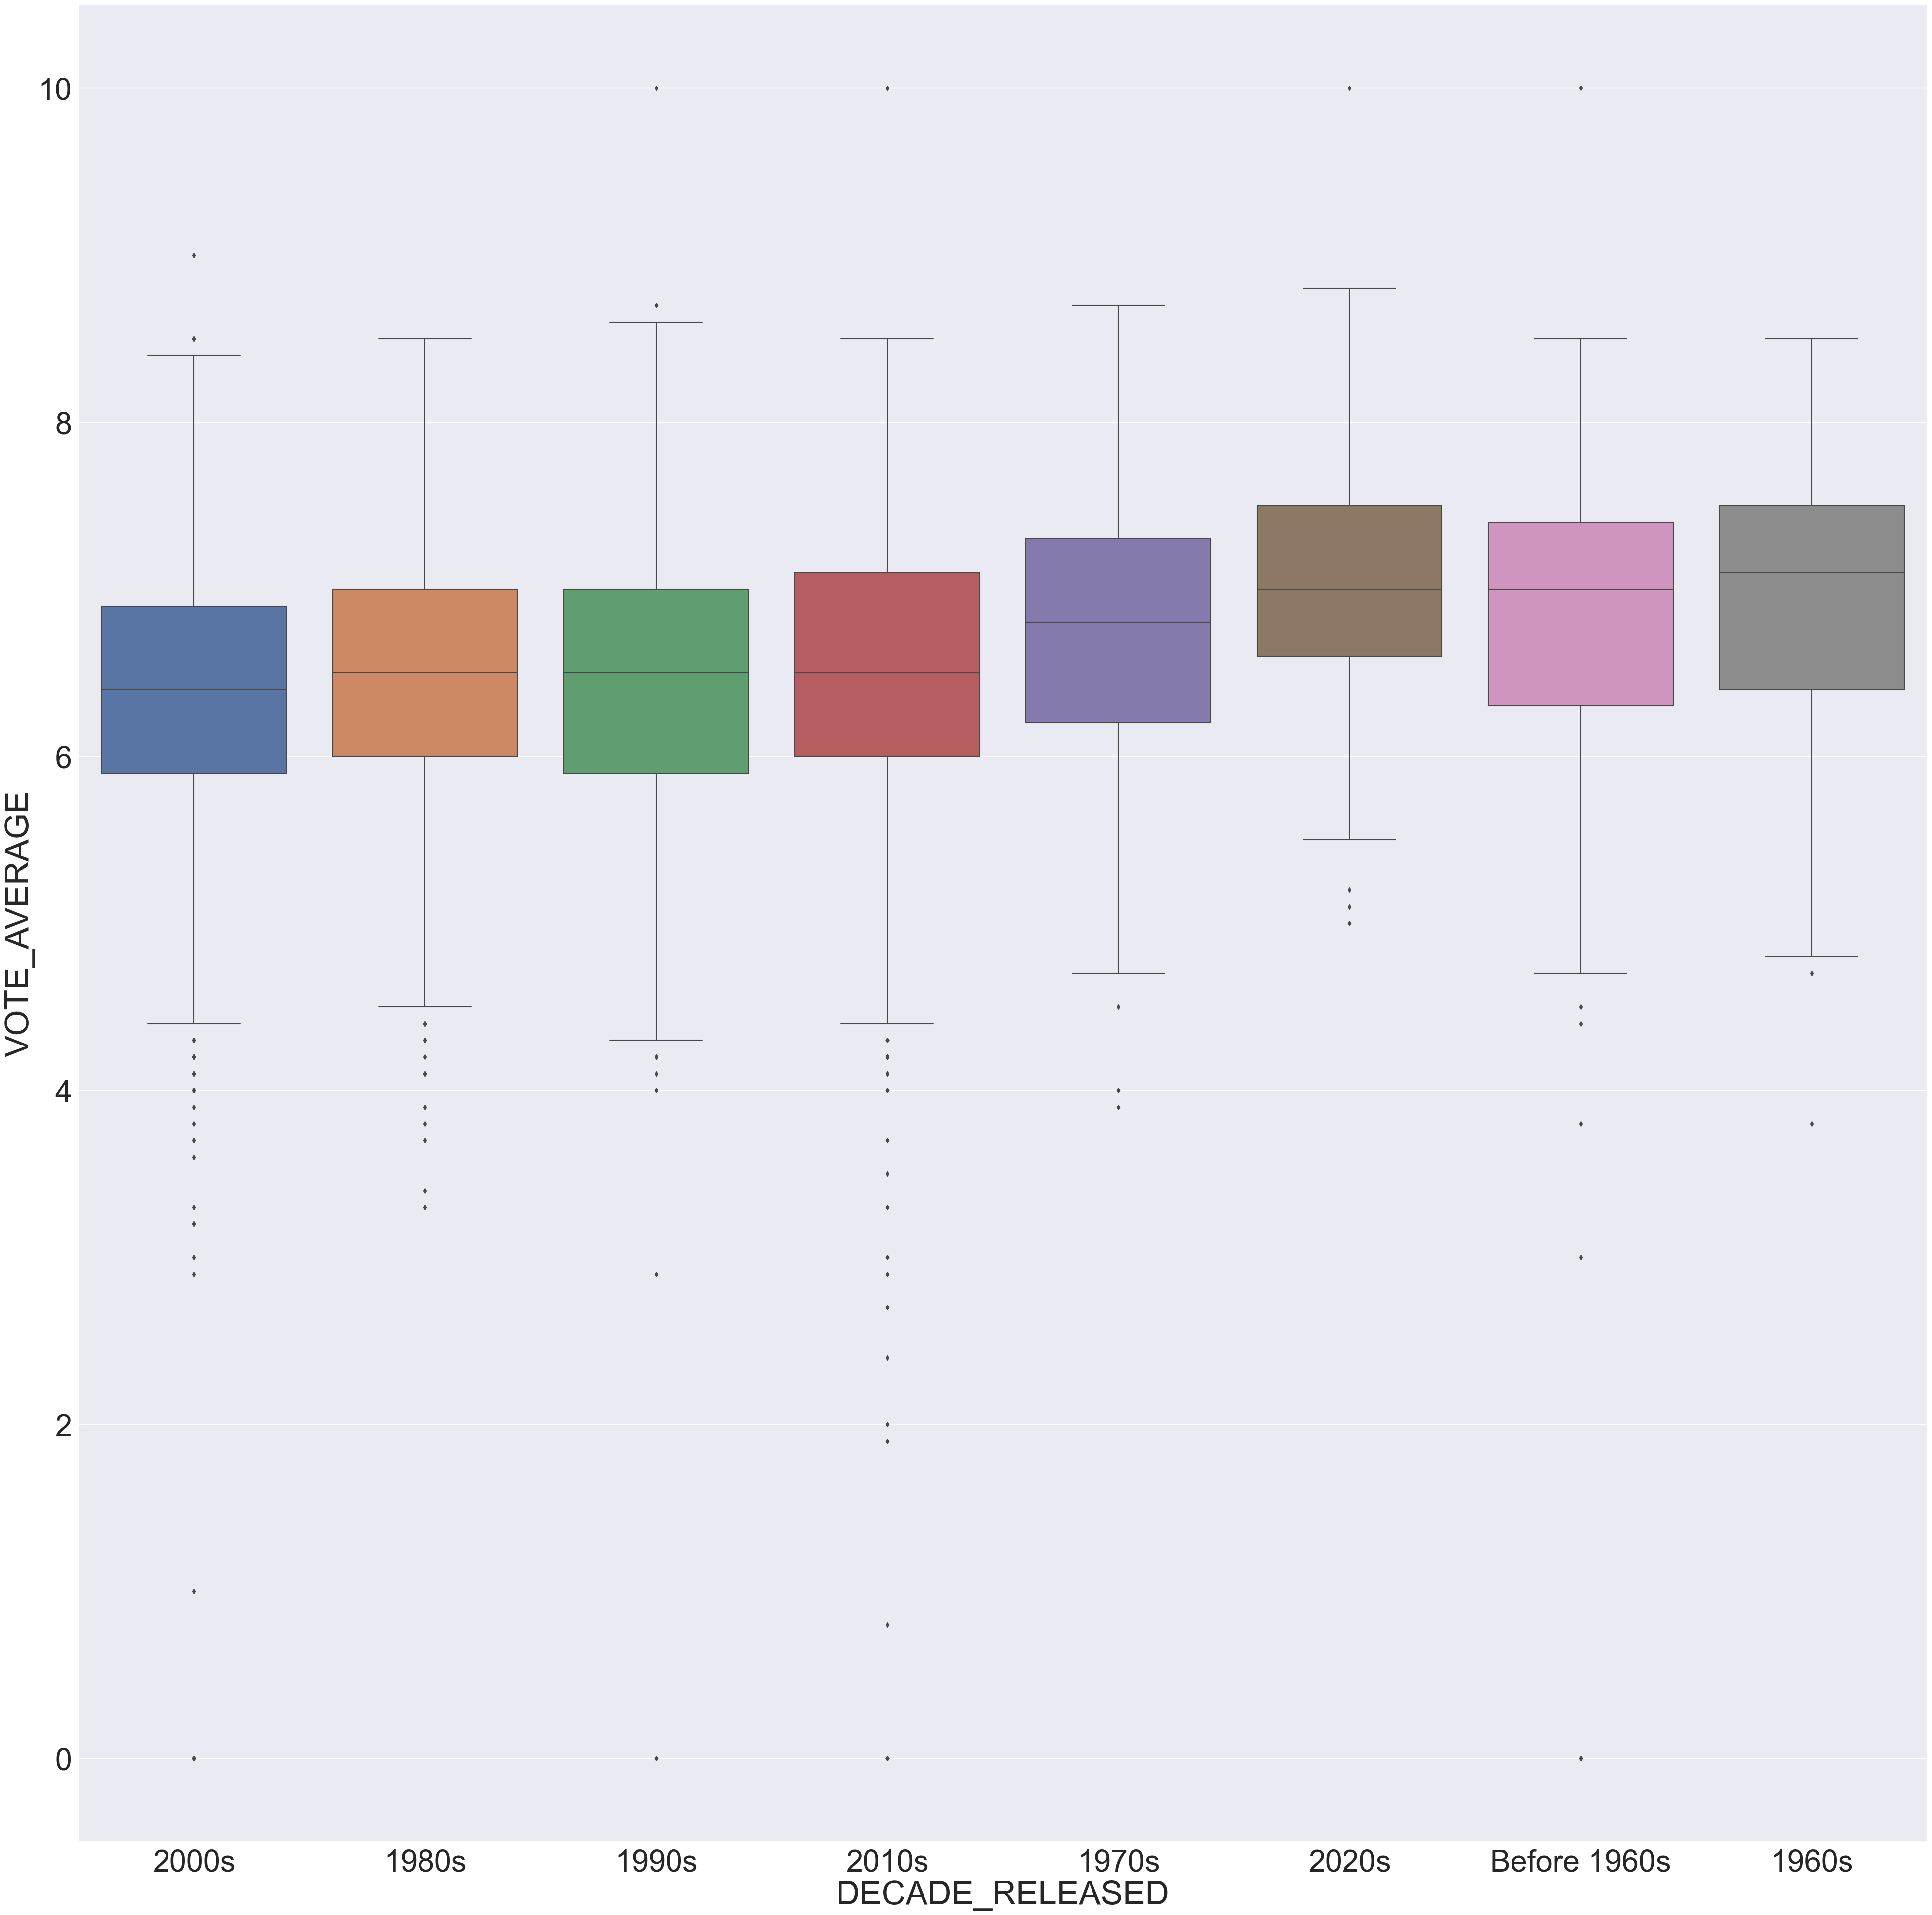

In [123]:
f= plt.subplots(figsize=(48, 48))
sb.boxplot(x = "DECADE_RELEASED", y = "VOTE_AVERAGE", data = df_correlationDR, width = 0.8, 
           order = df_correlationDR.groupby("DECADE_RELEASED")["VOTE_AVERAGE"].median().sort_values().index)

Generally not too much change in VOTE_AVERAGE relating to DECADE_RELEASED, hence even though there are differences in trendings and styles, recommendations of movies from different time periods are plausible

# Final Dataset

In [124]:
df_cleaned

,TITLE,ID,POPULARITY,VOTE_COUNT,VOTE_AVERAGE,RELEASE_DATE,ORIGINAL_LANGUAGE,ADULT,BUDGET,GENRES,REVENUE,YEAR_RELEASED,DECADE_RELEASED,KEYWORDS,MAIN_GENRE
1,Avatar,19995,538.894,28651,7.6,2009-12-15,en,False,237000000,"Action, Adventure, Fantasy, Science Fiction",2920357254,2009,2000s,"['culture clash', 'future', 'space war', 'spac...",Action
2,Avengers: Endgame,299534,224.007,22830,8.3,2019-04-24,en,False,356000000,"Adventure, Science Fiction, Action",2799439100,2019,2010s,"['space travel', 'time travel', 'time machine'...",Adventure
3,Avatar: The Way of Water,76600,1124.883,5777,7.7,2022-12-14,en,False,460000000,"Science Fiction, Adventure, Action",2293000000,2022,2020s,"['loss of loved one', 'dying and death', 'alie...",Science Fiction
4,Titanic,597,173.561,22573,7.9,1997-11-18,en,False,200000000,"Drama, Romance",2187463944,1997,1990s,"['drowning', 'evacuation', 'shipwreck', 'icebe...",Drama
5,Star Wars: The Force Awakens,140607,59.017,17831,7.3,2015-12-15,en,False,245000000,"Adventure, Action, Science Fiction, Fantasy",2068223624,2015,2010s,"['android', 'spacecraft', 'space opera']",Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,At Long Last Love,4704,2.956,19,5.5,1975-03-01,en,False,6000000,"Comedy, Music, Romance",1500000,1975,1970s,"['gambling', 'singer']",Comedy
9994,Under Capricorn,4175,7.906,135,6.0,1949-09-08,en,False,2500000,"Crime, Drama, History, Romance, Thriller",1500000,1949,Before 1960s,"['loss of loved one', ""love of one's life"", 'i...",Crime
9995,Stolen Kisses,255,10.010,351,7.3,1968-09-04,fr,False,350000,"Comedy, Drama, Romance",1500000,1968,1960s,"['individual', 'paris, france', 'shyness', 'ad...",Comedy
9996,To Be or Not to Be,198,9.185,571,7.9,1942-03-05,en,False,1200000,"Comedy, War",1500000,1942,Before 1960s,"['love triangle', 'london, england', 'infideli...",Comedy


POPULARITY and VOTE_COUNT would be similar to VOTE_AVERAGE as they are both measuring viewership. GENRES will be shortened to MAIN_GENRE to help create clearer clusters. ADULT does not affect as all have the same value. ORIGINAL_LANGUAGE likely will not affect as translations exist and more than 80% of movies are in english. YEAR_RELEASED and RELEASE_DATE are categorised using DECADE_RELEASED. Therefore, they will all be removed and only the relevant columns are kept. 

We decided on we will be creating our model based on VOTE_AVERAGE, BUDGET, RELEASE, DECADE_RELEASED and MAIN_GENRE.

In [125]:
#Remove unwanted columns which will not benefit the model
df_progress = df_cleaned.drop(columns = ["POPULARITY", "GENRES", "ADULT", "VOTE_COUNT", "ORIGINAL_LANGUAGE", 
                                        "YEAR_RELEASED", "RELEASE_DATE", "KEYWORDS"])
df_progress2 = df_progress.reset_index(drop=True)
df_progress2

,TITLE,ID,VOTE_AVERAGE,BUDGET,REVENUE,DECADE_RELEASED,MAIN_GENRE
0,Avatar,19995,7.6,237000000,2920357254,2000s,Action
1,Avengers: Endgame,299534,8.3,356000000,2799439100,2010s,Adventure
2,Avatar: The Way of Water,76600,7.7,460000000,2293000000,2020s,Science Fiction
3,Titanic,597,7.9,200000000,2187463944,1990s,Drama
4,Star Wars: The Force Awakens,140607,7.3,245000000,2068223624,2010s,Adventure
...,...,...,...,...,...,...,...
6966,At Long Last Love,4704,5.5,6000000,1500000,1970s,Comedy
6967,Under Capricorn,4175,6.0,2500000,1500000,Before 1960s,Crime
6968,Stolen Kisses,255,7.3,350000,1500000,1960s,Comedy
6969,To Be or Not to Be,198,7.9,1200000,1500000,Before 1960s,Comedy


In [126]:
df_progress2.to_csv('cleaned_1015.csv')